In [13]:
%load_ext autoreload
%autoreload 2
from connection import sparql_request, wsd_request
import sparql as sql
from analytics import DiGraph, DAC, BabelNet_DiGraph
from similarity import ConceptSimilarity
from dataset import Dataset, SentenceDataset, map_name
from evaluation import WordSimEvaluation
from wmd import WordMoversSimilarity
from preprocessing import get_ideas_in_format, convert_dataset_dbp2wikidata
from helpers import flatten_array
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
pairs, sim = SData.load_i2m2018_ideas(map_name["environment"])

In [2]:
def setup_dataset_graph(dataset_name, database="wikidata", relatedness=True):
    con, cc, text = get_ideas_in_format(dataset_name, database=database)
    diG = DiGraph(concepts=con,dataset=dataset_name, database=database, relatedness=relatedness)
    #diG.build_nx_graph()
    if database=="wikidata":
        diG.global_secondorder_freq()

In [3]:
setup_dataset_graph("ac1")

Percent: 100.0% Worte to file: data/wikidata/DiGraph_rel_ac1.gml


In [75]:
pairs = SData.sentence_concept_annotation(dataset_name)

In [76]:
d,dd = convert_dataset_dbp2wikidata(dataset_name)

In [5]:
dataset_name="SmartTextile"
con, cc, text = get_ideas_in_format(dataset_name, database="babelnet")


In [38]:
contestIDs = [project["project"]["value"] for project in sparql_request(sql.query_innovonto_contests(), database="innovonto-core")]

In [39]:
contestIDs

[]

In [53]:
from pyld import jsonld


def constructFrame(response, ctype):
    frame = {
        "@context": response["@context"],
        "@type": ctype,
        "@embed": "@always"
    }
    return frame

res = sparql_request(sql.query_find_all_contest_ideas("http://purl.org/innovonto/ideaContests/TCO"), database="innovonto-core")
datasetTCO = jsonld.frame(res, constructFrame(res, "gi2mo:Idea"))

In [54]:
dataTCO = [dict(id=idea["@id"],content=idea["content"],concept=idea["concept"]) for idea in datasetTCO["@graph"] if not "textualRefinement" in idea]

In [60]:
len(dataTCO)

17

In [23]:
sql.query_babelnet_number_of("bn:003107n")

'\n    prefix bn: <http://babelnet.org/rdf/s>\n    SELECT (COUNT(*) AS ?count) \n    WHERE {?item skos:broader bn:003107n.}\n    '

In [36]:
sparql_request(sql.babelnet_paths2top("bn:003107n"), database="babelnet")

[]

In [6]:
diG = BabelNet_DiGraph(concepts=con,dataset=dataset_name, database="babelnet")

In [7]:
diG.global_secondorder_freq()

Percent: 100.0% Worte to file: data/babelnet/DiGraph_SmartTextile.gml


In [156]:
diG.graph.__len__()

3597

In [159]:
csimi = ConceptSimilarity(diG)
M, LCS = csimi.all_shortest_paths_and_LCS()

done calculation all shortest distance


In [80]:
diG.global_secondorder_freq()

Percent: 26.79%timeout Q3013519
Percent: 50.07%timeout Q31207
Percent: 100.0% Worte to file: data/wikidata/DiGraph_rel_environment.gml


In [68]:
a[:11]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:

from nltk.corpus.reader.wordnet import information_content

In [7]:
c, cc, text = get_ideas_in_format("MSRvid")

In [72]:
dg_sen = DiGraph(concepts=c, dataset="MSRvid", relatedness=True)

NameError: name 'c' is not defined

In [300]:
dg_sen.global_secondorder_freq()

Percent: 0.04%

[autoreload of evaluation failed: Traceback (most recent call last):
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/lukastaerk/Library/Python/3.7/lib/python/site-packages/IPython/extensions/autoreload.py", line 266,

Percent: 67.02%timeout Q1433006
Percent: 100.0% Worte to file: data/wikidata/DiGraph_rel_MSRvid.gml


In [82]:
CS = ConceptSimilarity(dg)
CS.all_shortest_paths_and_LCS(lcs_pref_value="freq")

SystemError: <class 'UnicodeDecodeError'> returned a result with an error set


done calculation all shortest distance for: freq


(array([[ 0.,  5.,  7., ..., 10., 17.,  5.],
        [ 5.,  0., 15., ..., 19., 17., 17.],
        [ 7., 15.,  0., ...,  9., 17.,  8.],
        ...,
        [10., 19.,  9., ...,  0., 16.,  4.],
        [17., 17., 17., ..., 16.,  0., 17.],
        [ 5., 17.,  8., ...,  4., 17.,  0.]]),
 array([[4447.,  962.,  299., ...,  612.,  494.,  210.],
        [ 962., 3723.,  329., ...,   89.,   89.,   89.],
        [ 299.,  329., 3275., ...,  301.,  196.,  302.],
        ...,
        [ 612.,   89.,  301., ..., 2615.,  385.,  809.],
        [ 494.,   89.,  196., ...,  385., 2648.,  307.],
        [ 210.,   89.,  302., ...,  809.,  307., 3317.]]))

In [14]:
c, datagold = DS.load_idea_dataset("ac1")
datagold[1]

{'text': 'With the help of TCO, simple measurements can be carried out in urban areas that would otherwise require more complex installations. The frequency of use can be measured by contact on roads, park benches, bicycle stations, bus stops, so that one knows more about the requirements and necessities in urban space.',
 'concepts': [{'value': 'measurements', 'wikidata_id': 'Q12453'},
  {'value': 'park', 'wikidata_id': 'Q22698'},
  {'value': 'bicycle', 'wikidata_id': 'Q11442'},
  {'value': 'benches', 'wikidata_id': 'Q204776'},
  {'value': 'urban space', 'wikidata_id': 'Q702492'},
  {'value': 'bus', 'wikidata_id': 'Q5638'}]}

In [188]:
sim = CS.similarityMatrix()

done calculation all shortest distance for: freq


In [192]:
wmd = WordMoversSimilarity(sim, CS.G._concepts)
c, datagold = DS.load_idea_dataset("gold")
s1, s2, s4 = datagold[0], datagold[1], datagold[3]
print(s1["text"],'\n', s2["text"], '\n', s4["text"])

You could put it on a car for businesses or self employed people to advertise. A realtor could add a house address or a hairdresser or restaurant could put a daily special or coupon code. 
 The walls of schools could be interactive flashcards. 
 You could put it on your car windows to make them darker or lighter for privacy, that would also help with sun glare, you could touch the spot where the sun is shining in your eyes.


In [193]:
ss1,ss2, ss4 = [c["id"] for c in s1["concepts"]], [c["id"] for c in s2["concepts"]], [c["id"] for c in s4["concepts"]]
v1,v2, v4 = [c["value"] for c in s1["concepts"]], [c["value"] for c in s2["concepts"]], [c["value"] for c in s4["concepts"]]
print(v1,'\n', v2,'\n', v3)
prob = wmd.word_mover_distance_probspec(ss1, ss4)
pulp.value(prob.objective)

['car', 'businesses', 'self employed people', 'advertise', 'realtor', 'house address', 'hairdresser', 'restaurant', 'daily special', 'coupon code', 'self employed', 'people', 'realtor', 'house', 'daily special', 'coupon'] 
 ['walls', 'schools', 'interactive flashcards', 'flashcards'] 
 ['stove', 'making new recipes', 'recipes', 'making']
[[0.78848029 0.20887529 0.11358724 0.18766572 0.38453939 0.
  0.066149  ]
 [0.1813523  0.06303008 0.06303008 0.10262329 0.14531214 0.
  0.09769361]
 [0.16733064 0.12119813 0.10340304 0.07610782 0.18103444 0.
  0.07024914]
 [0.22281668 0.0728209  0.08768027 0.06723397 0.13523279 0.
  0.05629237]
 [0.15555552 0.06807059 0.09589706 0.05883535 0.11255755 0.
  0.05399552]
 [0.1390422  0.09523807 0.11706478 0.12729644 0.42954167 0.
  0.10551367]
 [0.15555552 0.07380212 0.10904172 0.06307567 0.12487036 0.
  0.05750521]
 [0.25932411 0.11506846 0.13215468 0.06894331 0.24718567 0.
  0.066149  ]
 [0.05401986 0.05401986 0.16588739 0.06021335 0.08121222 0.
  0.0512

0.2675425024528055

In [56]:
dg.build_nx_graph(concepts=con)

Percent: 0.08%

TypeError: 'NoneType' object is not iterable

In [53]:
dg.global_secondorder_freq()

Percent: 100.0% Worte to file: data/wikidata/DiGraph_rel_noun_simlex.gml


In [28]:
ws353 = DAC(dataset="noun_ws353", relatedness=True)
con, w, func = DS.transform_dataset("noun_ws353")


In [29]:
import visualize as vis 

In [30]:
vehicle = ws353.get_subgraph_from("Q42889")

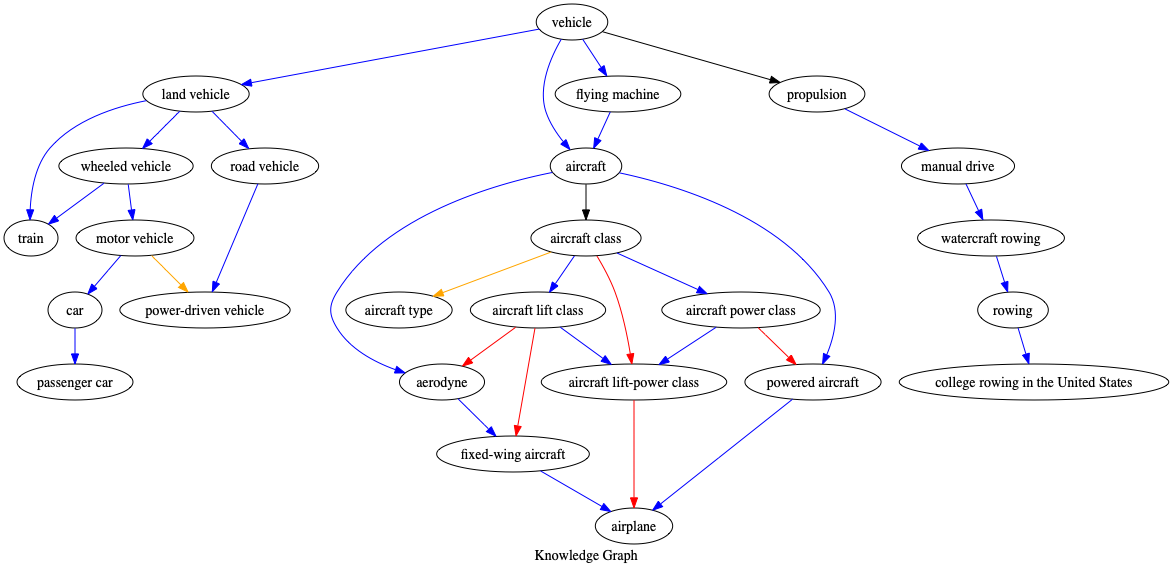

In [31]:
v = vis.draw_graph("vehicle",vehicle, concepts=ws353._concepts)

In [22]:
ws_e = WordSimEvaluation()

In [ ]:
ws_e.evaluate_wpath_k("wpath_graph", "noun_rg", lsc_pref_value="freq1", ic_func="ic_graph_local",display_table=True, relatedness=True)

In [33]:
consim = ConceptSimilarity(ws353)

In [37]:
consim.wn_wpath(1,2, noun1="car", noun2="bike")

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')] [Synset('motorcycle.n.01'), Synset('bicycle.n.01')]


0.13200341371534552

In [6]:
consim.all_shortest_paths_and_LCS()

done calculation all shortest distance


(array([], shape=(0, 0), dtype=float64),
 array([], shape=(0, 0), dtype=float64))

In [26]:
from pyemd import emd, emd_with_flow
import numpy as np

In [27]:
a = np.ones(3)/2
a[2]= 0
b = np.ones(3)/3
dist = np.array([[0.1, 0.8, 0.8],
                [0.5, 0.6, 0.2], 
                [1,1,1]])
print(a, b, dist)

[0.5 0.5 0. ] [0.33333333 0.33333333 0.33333333] [[0.1 0.8 0.8]
 [0.5 0.6 0.2]
 [1.  1.  1. ]]


In [32]:
r = emd_with_flow(a, b, dist)
print(r[0])
flow = np.array(r[1])
print(flow)

0.16666620000000001
[[0.333333 0.       0.166666]
 [0.       0.333333 0.166667]
 [0.       0.       0.      ]]


In [35]:
sum(sum(dist*flow))

0.3999993

In [39]:
import pulp

In [47]:
from itertools import product
from collections import defaultdict
list(product(["sdaf", "sadf"], range(2)))

[('sdaf', 0), ('sdaf', 1), ('sadf', 0), ('sadf', 1)]

In [46]:
tokens_to_fracdict(["asdf", "sadf"])

{'asdf': 0.5, 'sadf': 0.5}

In [76]:
a = ["President", "talk", "Chicago"]
b = ["President", "Illinois"]
dist = np.array([[0.8, 0.1, 0.1],
                [0.2, 0.6, 0.7]])
prob = word_mover_distance_probspec(b, a, dist)

In [75]:
pulp.value(prob.objective)

0.53333333

WMD:
MAXIMIZE
0.9*T_matrix_('Illinois',_'Chicago') + 0.2*T_matrix_('Illinois',_'President') + 0.6*T_matrix_('Illinois',_'talk') + 0.1*T_matrix_('President',_'Chicago') + 0.9*T_matrix_('President',_'President') + 0.1*T_matrix_('President',_'talk') + 0.0
SUBJECT TO
_C1: T_matrix_('Illinois',_'President') + T_matrix_('President',_'President')
 = 0.333333333333

_C2: T_matrix_('Illinois',_'talk') + T_matrix_('President',_'talk')
 = 0.333333333333

_C3: T_matrix_('Illinois',_'Chicago') + T_matrix_('President',_'Chicago')
 = 0.333333333333

_C4: T_matrix_('President',_'Chicago') + T_matrix_('President',_'President')
 + T_matrix_('President',_'talk') = 0.5

_C5: T_matrix_('Illinois',_'Chicago') + T_matrix_('Illinois',_'President')
 + T_matrix_('Illinois',_'talk') = 0.5

VARIABLES
T_matrix_('Illinois',_'Chicago') Continuous
T_matrix_('Illinois',_'President') Continuous
T_matrix_('Illinois',_'talk') Continuous
T_matrix_('President',_'Chicago') Continuous
T_matrix_('President',_'President') Cont